In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests

url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
local_file_path = "lemonade.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the response content to a file
    with open(local_file_path, "wb") as file:
        file.write(response.content)
    print("CSV file downloaded successfully.")
else:
    print("Failed to download the CSV file.")


CSV file downloaded successfully.


In [6]:
df = pd.read_csv(url)

In [7]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


<AxesSubplot:>

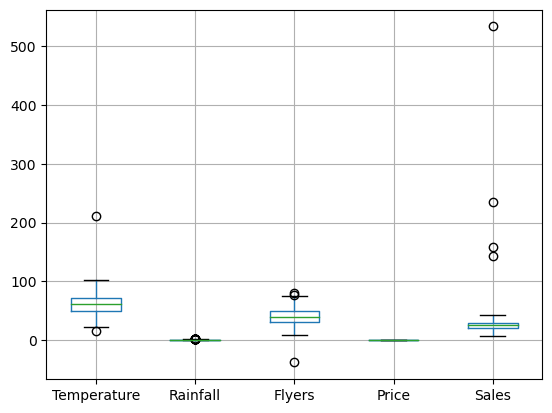

In [19]:
df.boxplot()

# 1. Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [11]:
#get the 1st quantile of examination column
df.Temperature.quantile(0.25)

49.7

In [13]:

#start with an inner fence calculation
multiplier =1.5

#calculate our q1 and q3
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)
iqr = q3-q1
q1, q3, iqr


(49.7, 71.7, 22.0)

In [14]:
q1 - (multiplier * iqr)


16.700000000000003

In [15]:
q3 + (multiplier * iqr)


104.7

In [16]:

#because we are using 1.5 as our multiplier- this will be an inner fence
inner_lower_fence = q1 - (multiplier * iqr) 
inner_upper_fence = q3 + (multiplier * iqr) 

In [18]:
#check out the dataframe where examination is under our fences (lower OR upper)
#using pipe for boolean operator "OR"
df[(df['Temperature'] < inner_lower_fence) | (df['Temperature'] > inner_upper_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

# 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv